# Data Preprocessing


## Imports

In [7]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image 
import plotly.graph_objects as go
import sys
import os

In [8]:
sns.set()
plt.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [9]:
from clean_audio import CleanAudio
from file_handler import FileHandler
from audio_vis import AudioVis

In [10]:
clean_audio = CleanAudio()
file_handler = FileHandler()
audio_vis = AudioVis()

## Load Data


In [18]:
PATH_TRAIN_WAV = "../data/AMHARIC_CLEAN/train/wav/"
PATH_TEST_WAV = "../data/AMHARIC_CLEAN/test/wav/"

In [19]:
data = pd.read_csv(r'../data/clean_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1026 non-null   int64  
 1   key          1026 non-null   object 
 2   text         1026 non-null   object 
 3   category     1026 non-null   object 
 4   char_length  1026 non-null   int64  
 5   duration     1026 non-null   float64
 6   clean_text   1026 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 56.2+ KB


## Update Metadata

Since we have cleaned the audio and trascription, the metadata has to be updated

In [20]:
duration_of_recordings = []
for i in range(data.shape[0]):
    path = ""
    if data.category[i] == "Train":
        path = PATH_TRAIN_WAV + data.key[i] + ".npy"
    else:
        path = PATH_TEST_WAV + data.key[i] + ".npy"

    audio = np.load(path)  # load
    duration_of_recordings.append(float(len(audio) / 8000))

In [22]:
data["duration_clean"] = duration_of_recordings
data["char_length_clean"] = [len(i) for i in data.clean_text]
data["speed"] = data.char_length / data.duration
data["speed_clean"] = data.char_length_clean / data.duration_clean


In [23]:
data = data[['key', 'text', 'clean_text', 'char_length',
             'char_length_clean', 'duration', 'duration_clean', 
             'speed', 'speed_clean', 'category' ]]
data.head(10)

key                                                                            text                                                                      clean_text  char_length  char_length_clean  duration  duration_clean  speed  speed_clean category
0  tr_10300_tr100022             ኢትዮጵያ በገና በ አል ዋዜማ ላይ ኤርትራውያን ን ማባረር ጀመረች ለሚ ለውም ገና ው የ ፈረንጆች ገና ነው             ኢትዮጵያ በገና በ አል ዋዜማ ላይ ኤርትራውያን ን ማባረር ጀመረች ለሚ ለውም ገና ው የ ፈረንጆች ገና ነው           67                 67      6.91            6.91   9.69         9.69    Train
1  tr_10301_tr100023                                               ከዚያ ወዲህ ሶስት ወር ተጨምሮ እስካሁን ሰባት ሆኗል                                               ከዚያ ወዲህ ሶስት ወር ተጨምሮ እስካሁን ሰባት ሆኗል           33                 33      4.61            4.61   7.16         7.16    Train
2  tr_10302_tr100024                                  ያን ን ተቋም ነው ወደ ወያኔ ትራንስፖርት ኩባንያ ነት የ ለወጡት ብለዋል                                  ያን ን ተቋም ነው ወደ ወያኔ ትራንስፖርት ኩባንያ ነት የ ለወጡት ብለዋል           46                 46      4.48            4.48  10.27        10.27    Train
3  tr_10303_tr100025         በ ምዝገባው ወቅት አንዳንዶቹ በ ሰጡት አስተያየት ወደ አገራቸው ለ መመለስ ከፍተኛ ፍላጐት እንዳ ላቸው ገልጸዋል         በ ምዝገባው ወቅት አንዳንዶቹ በ ሰጡት አስተያየት ወደ አገራቸው ለ መመለስ ከፍተኛ ፍላጐት እንዳ ላቸው ገልጸዋል           71                 71      6.78            6.78  10.47        10.47    Train
4  tr_10304_tr100026                                                     ኢትዮጵያውያ ን ከ አስመራ እየ ተባረሩ ነው                                                     ኢትዮጵያውያ ን ከ አስመራ እየ ተባረሩ ነው           27                 27      3.58            3.58   7.53         7.53    Train
5  tr_10305_tr100027  ቢቢሲ ጠቅላይ ሚንስትር መለስ ና ፕሬዚዳንት ኢሳያስ በ ግንባር ተገናኙ አለ የ ኢትዮጵያ የውጭ ጉዳይ ሚኒስቴር አስተባ በ ለ  ቢቢሲ ጠቅላይ ሚንስትር መለስ ና ፕሬዚዳንት ኢሳያስ በ ግንባር ተገናኙ አለ የ ኢትዮጵያ የውጭ ጉዳይ ሚኒስቴር አስተባ በ ለ           78                 78      8.06            8.06   9.67         9.67    Train
6  tr_10306_tr100028                                                    ግብ የ ማደን ተልእኮው ንም እያሳ ካ መ ቷል                                                    ግብ የ ማደን ተልእኮው ንም እያሳ ካ መ ቷል           28                 28      3.84            3.84   7.29         7.29    Train
7  tr_10307_tr100029                                               አቶ መለስ የ ሻእቢያ ዲፕሎማቶች ን ሰላዮች አ ሏቸው                                               አቶ መለስ የ ሻእቢያ ዲፕሎማቶች ን ሰላዮች አ ሏቸው           33                 33      4.61            4.61   7.16         7.16    Train
8  tr_10308_tr100030                                                  ስድስት የ ደህንነት ሀላፊዎች ና ሰራተኞች ታገዱ                                                  ስድስት የ ደህንነት ሀላፊዎች ና ሰራተኞች ታገዱ           30                 30      4.35            4.03   6.89         7.44    Train
9  tr_10309_tr100031                                ውድድሮቹ ዛሬ ና ነገ በ አዲስ አበባ ስቴዲዮም ቀጥለው እንደሚ ካሄዱ ታውቋል                                ውድድሮቹ ዛሬ ና ነገ በ አዲስ አበባ ስቴዲዮም ቀጥለው እንደሚ ካሄዱ ታውቋል           48                 48      5.76            5.76   8.33         8.33    Train

## Remove Outliers

Outliers are extreme values that deviate from other observations on data, they may indicate variability in measurement, experimental errors, or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample. In our dataset, we will be looking for outliers based on duration, character length, and speed.

### Char length

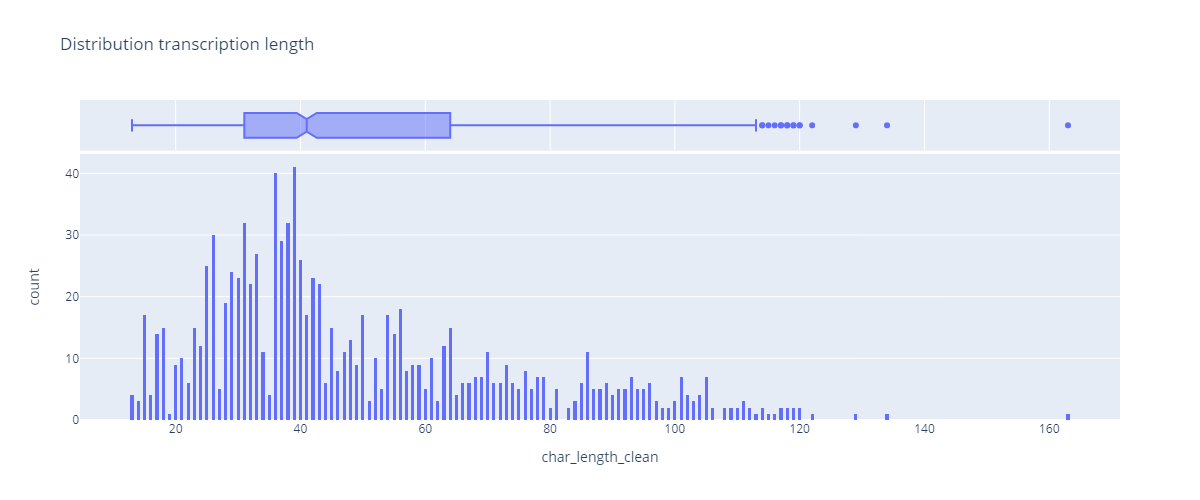

In [24]:
fig = px.histogram(data, x="char_length_clean", marginal="box", nbins=500,
                   title='Distribution transcription length',)
Image(pio.to_image(fig, format='png', width=1200))

Most transcripts range in length from 30 to 70 characters. This includes rows without transcription and others with more than 150 characters long transcription.


In [12]:
initial_size = data.shape[0]
data = data[data['char_length_clean'] > 10]
print(f'percentage of data lost after removing less than 10 character transcriptions: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing less than 10 character transcriptions: 0.0534%


In [13]:
initial_size = data.shape[0]
data = data[data['char_length_clean'] < 125]
print(f'percentage of data lost after removing more than 130 character transcriptions: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing more than 130 character transcriptions: 0.6413%


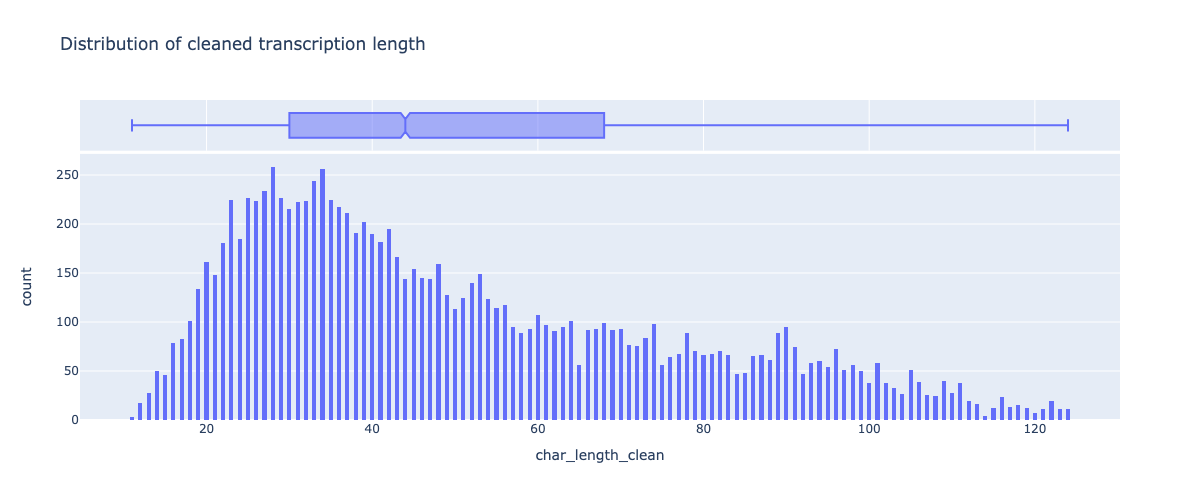

In [14]:
fig = px.histogram(data, x="char_length_clean", marginal="box", nbins=500,
                   title='Distribution of cleaned transcription length')
Image(pio.to_image(fig, format='png', width=1200))


After deleting rows in which transcription length is less than 10 and more than 125, data loss is less than 1%


### Duration

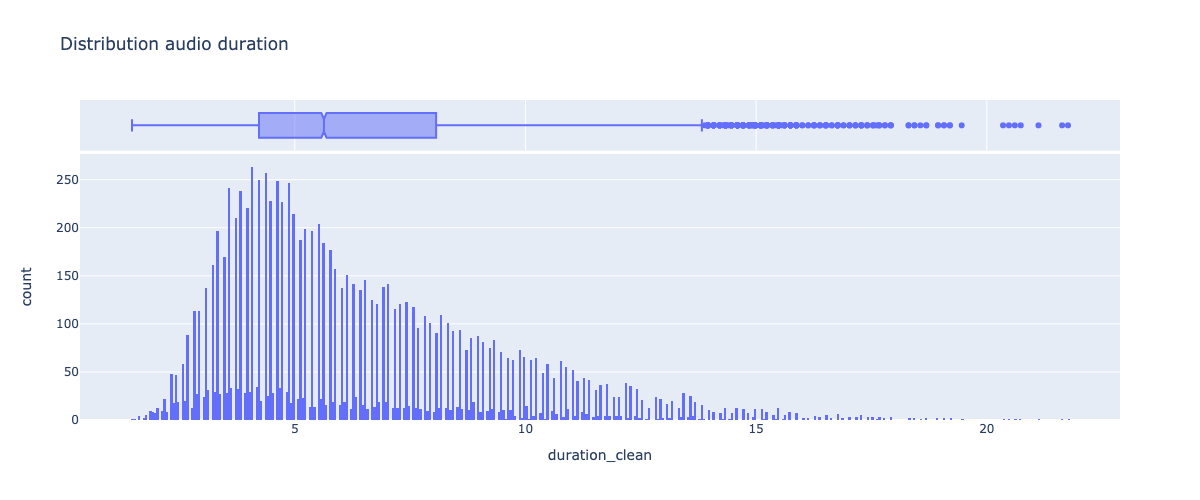

In [15]:
fig = px.histogram(data, x="duration_clean", marginal="box", nbins=500,
                   title='Distribution audio duration')
Image(pio.to_image(fig, format='png', width=1200))

We can see most of the audios are between 4 to 8 seconds long.

In [16]:
initial_size = data.shape[0]
data = data[data['duration_clean'] > 2]
print(f'percentage of data lost after removing audio files with less than 2 second duration: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing audio files with less than 2 second duration: 0.3317%


In [17]:
initial_size = data.shape[0]
data = data[data['duration_clean'] < 14]
print(f'percentage of data lost after removing audio files with more than 18 seconds duration: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')


percentage of data lost after removing audio files with more than 18 seconds duration: 1.9066%


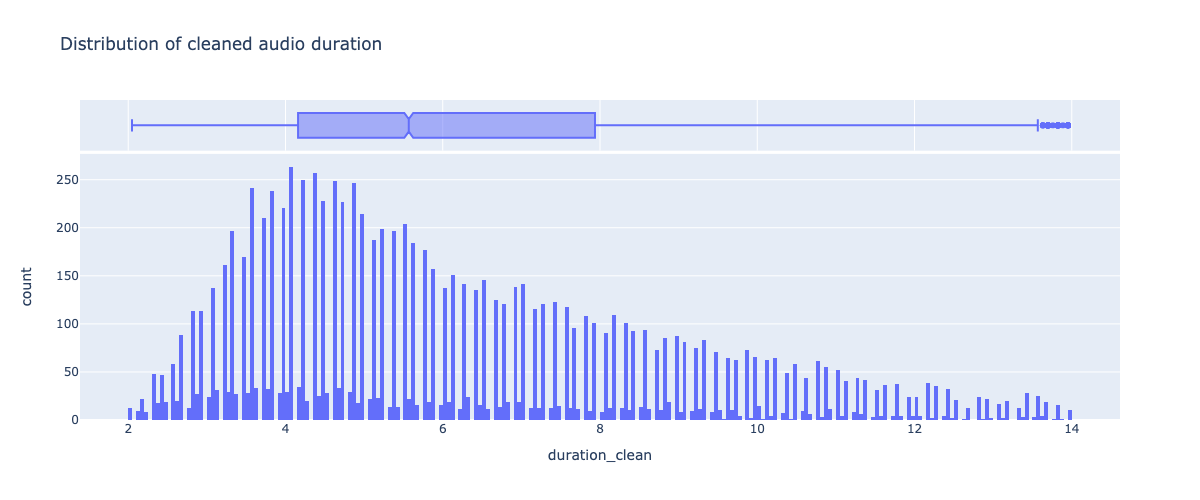

In [18]:
fig = px.histogram(data, x="duration_clean", marginal="box", nbins=500, title='Distribution of cleaned audio duration')
Image(pio.to_image(fig, format='png', width=1200))


Removing the audios shorter than 2 seconds and longer than 14 seconds, resulted in a loss of around 2 % of the data.


### Speed

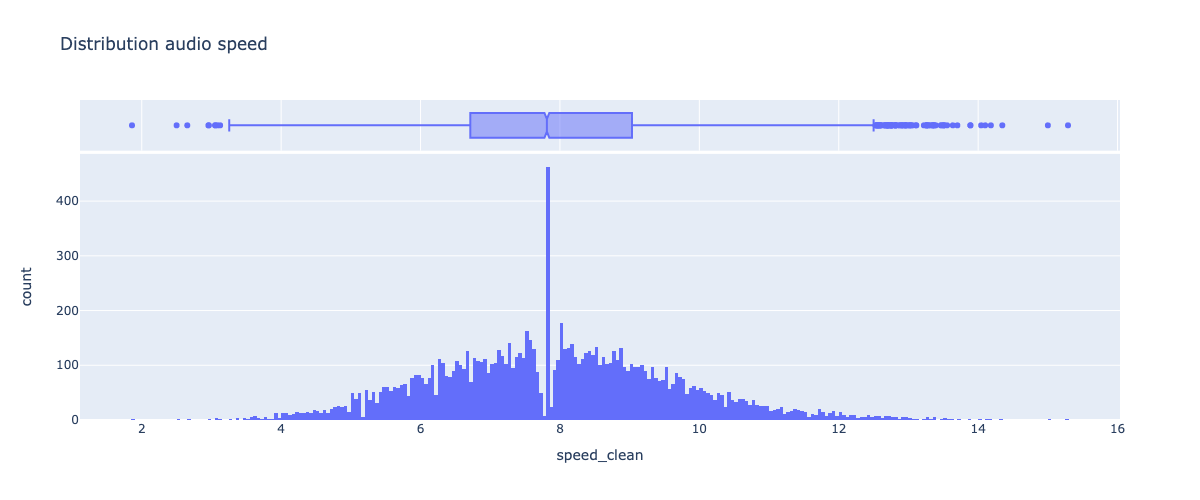

In [19]:
fig = px.histogram(data, x="speed_clean", marginal="box", nbins=500,
                   title='Distribution audio speed')
Image(pio.to_image(fig, format='png', width=1200))

We can estimate the audio speed by dividing the character length by duration. We can do this because we have already removed most of the extra silence of the audio signals. The distribution graph above shows there are rows where the speed is zero and more than 16.


In [20]:
initial_size = data.shape[0]
data = data[data['speed_clean'] > 4]
print(f'percentage of data lost after removing audio files with less than 4 char per second: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing audio files with less than 4 char per second: 0.5409%


In [21]:
initial_size = data.shape[0]
data = data[data['speed_clean'] < 12]
print(f'percentage of data lost after removing audio files with greater than 14 char per second: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing audio files with greater than 14 char per second: 1.6040%


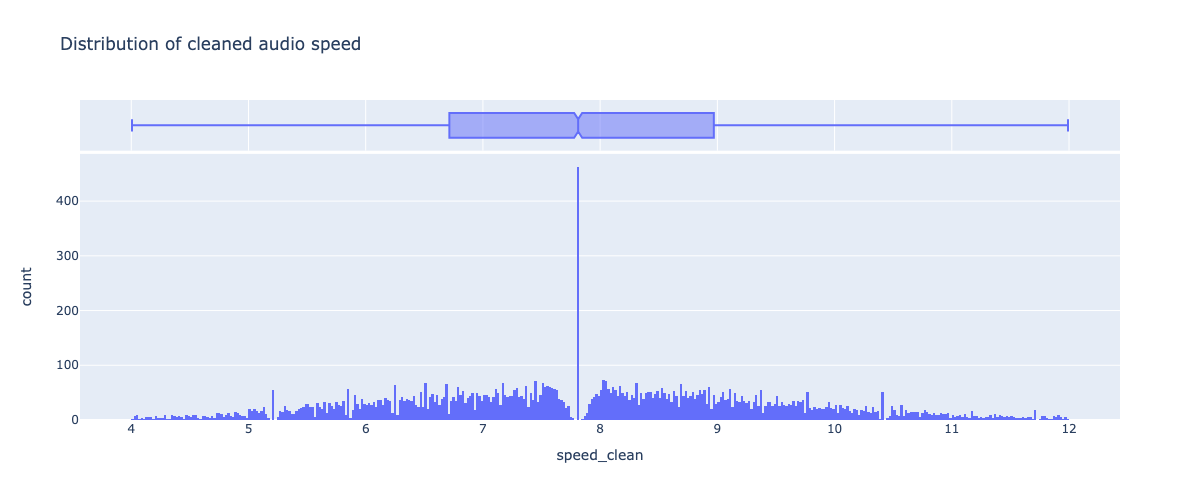

In [22]:
fig = px.histogram(data, x="speed_clean", marginal="box", nbins=500, title='Distribution of cleaned audio speed')
Image(pio.to_image(fig, format='png', width=1200))

Removing the rows where the speed is less than four or more than twelve. This also led to the loss of approximately 2 % of the data.


### Final data

In [25]:
final_data = data[['key', 'clean_text', 'char_length_clean', 'duration_clean', 'speed_clean', 'category']]
final_data.rename(columns={'clean_text': 'text', 'char_length_clean': 'char_length', 
                           'duration_clean':'duration', 'speed_clean': 'speed'}, inplace=True, errors='raise')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          1026 non-null   object 
 1   text         1026 non-null   object 
 2   char_length  1026 non-null   int64  
 3   duration     1026 non-null   float64
 4   speed        1026 non-null   float64
 5   category     1026 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 48.2+ KB


## Save cleaned data

In [26]:
final_data.to_csv('../data/final_data.csv')